In [1]:
import numpy as np
import pandas as pd
import os as os

In [2]:
os.chdir('/Users/raghuramkowdeed/Documents/afp/')

In [3]:
%pylab inline
exec(open("./run_model.py").read())
exec(open("./get_signal_names.py").read())
exec(open("./portfolio_optimizer.py").read())

import datetime
from pylab import rcParams


Populating the interactive namespace from numpy and matplotlib


In [4]:
#sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/1000/ranked_rps_data/'
#fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/1000/factor_exposure_data/'
#fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/1000/fac_ret_file.csv'

use_rank = True

sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/rank/500/rps_data/'
fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/rank/500/factor_exposure_data/'
fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/rank/500/fac_ret_file.csv'

if not use_rank:
    sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/norm/500/rps_data/'
    fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/norm/500/factor_exposure_data/'
    fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/norm/500/fac_ret_file.csv'
    

In [5]:
sig_df = pd.DataFrame()
sig_files = os.listdir(sig_dir)
sig_files = np.sort(sig_files)

for sig_file in sig_files :
    if '.csv' not in sig_file :
        continue
    #print(sig_file)
    this_file = sig_dir + sig_file
    this_df = pd.read_csv(this_file, index_col = 'date')
    this_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in this_df.index]
    sig_df = sig_df.append(this_df)
data = sig_df.copy()

In [6]:
#model_name = 'linear_regression'
#train_model_arg = { 'fit_intercept':True }

model_name = 'pls_regression'
train_model_arg = { 'n_components':20, 'scale':True, 'max_iter':5000, 'tol':1e-08, 'copy':True }

look_back = 12

In [7]:
begin_date = datetime.datetime.strptime('19900101', '%Y%m%d')
end_date = datetime.datetime.strptime('20170101', '%Y%m%d')

sig_df = sig_df[(sig_df.index>=begin_date) & (sig_df.index<end_date)]
sig_df = sig_df.fillna(sig_df.mean())

In [8]:
'res_ret' in sig_df.columns

True

In [9]:
#factor_names =  ['beta','mve', 'bm', 'roic', 'agr', 'mom12m', 'idiovol']
factor_names =  ['beta']
sig_names = get_signal_names()
ret_sr = sig_df['ret']
sig_df = sig_df[sig_names]
sig_df = sig_df.drop(factor_names, axis=1)
sig_df = sig_df.drop(['idiovol'], axis=1)

In [10]:
model_sig_sr = run_model( sig_df, ret_sr, model_name, train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=look_back)

In [11]:
pm = PortfolioOptimizer(fac_data_dir=fac_data_dir,
                        fac_ret_file = fac_ret_file,
                        fac_cov_hl = 12.0,
                        fac_names = None
                       )


--------


In [12]:
pnl_sr = pm.run_signal(model_sig_sr, neu_sig=True)

0.915604466997


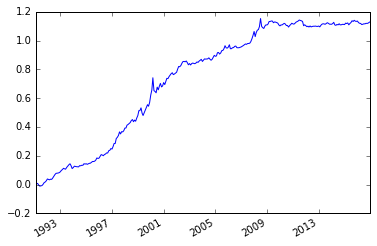

In [16]:
pnl_sr.cumsum().plot()
print( pnl_sr.mean()*sqrt(12)/pnl_sr.std() )

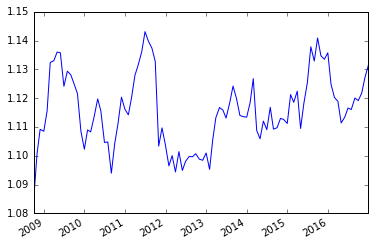

In [15]:
pnl_sr.cumsum().iloc[-100:].plot()